Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


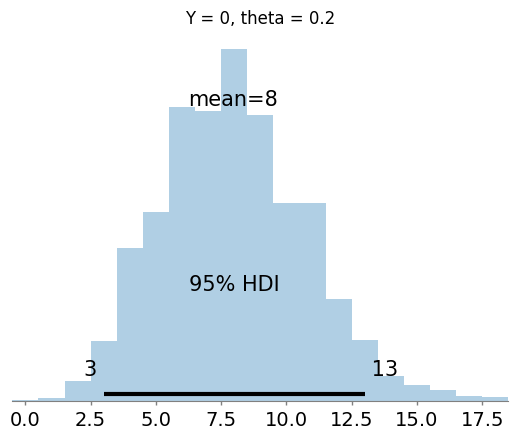

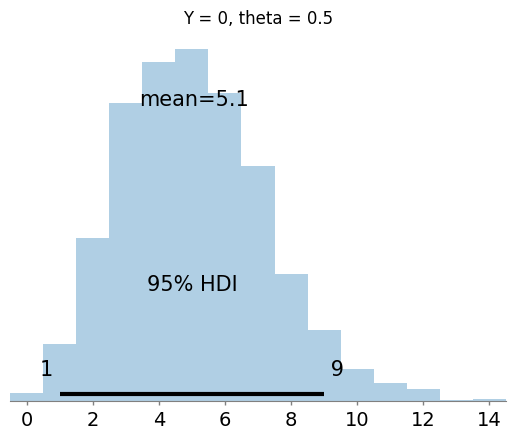

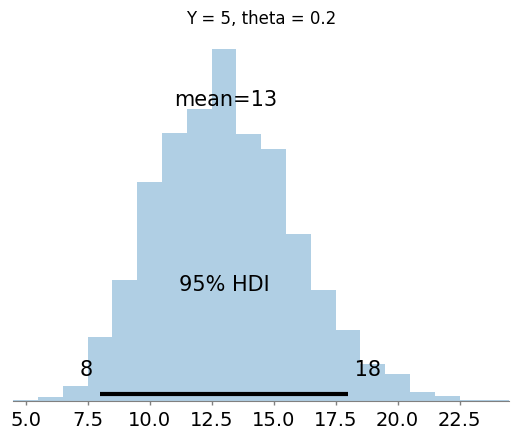

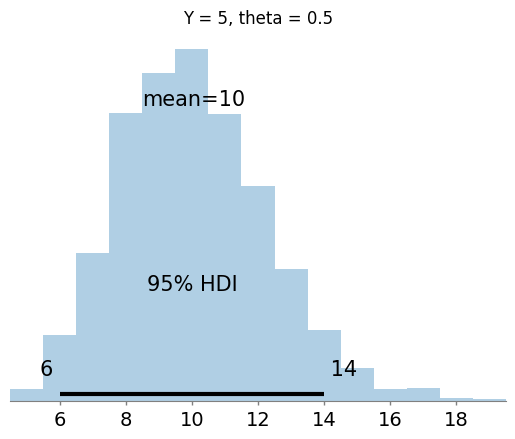

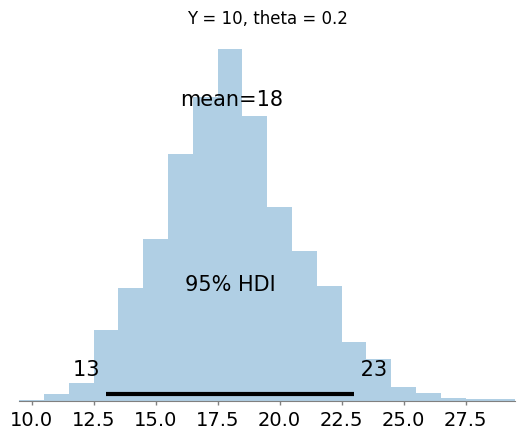

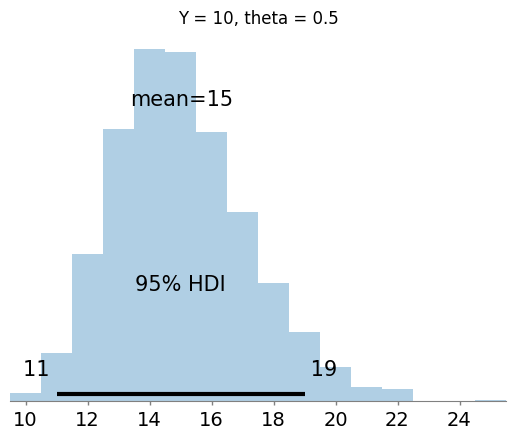

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

Y = np.array([0,0,5,5,10,10])
theta = np.array([0.2, 0.5, 0.2, 0.5, 0.2, 0.5])

with pm.Model() as model:
    n = pm.Poisson('n', mu=10, shape=6)
    y = pm.Binomial('y', n=n, p=theta, observed=Y)
    trace = pm.sample(1_000, return_inferencedata=True)

for i in range(6):
    az.plot_posterior(trace, var_names=['n'],coords={'n_dim_0': i}, hdi_prob=0.95)
    plt.title(f'Y = {Y[i]}, theta = {theta[i]}')
    plt.show()
    

Pentru fiecare pereche diferă valoarea lui $n$. Să luam ca exemplu $Y = 5$ și $\theta = 0.5$. În acest caz din $n$ clienți în medie 50% au cumpărat produsul, lucru ce e cel mai probabil când $n$ este 10, de unde și valorile rezultate.